## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_-3.0.png?raw=true" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_-2.0.png?raw=true" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_1.7.png?raw=true" width="600"/>

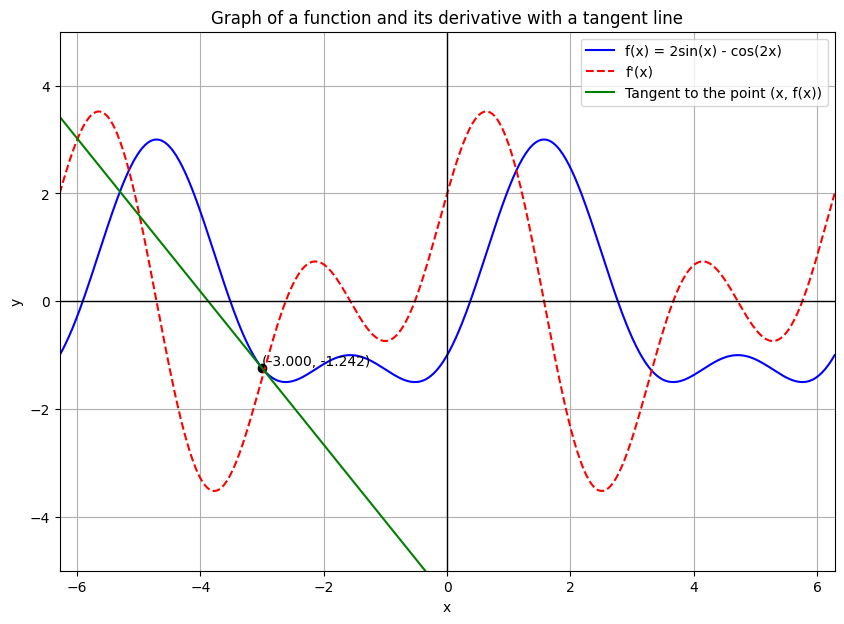

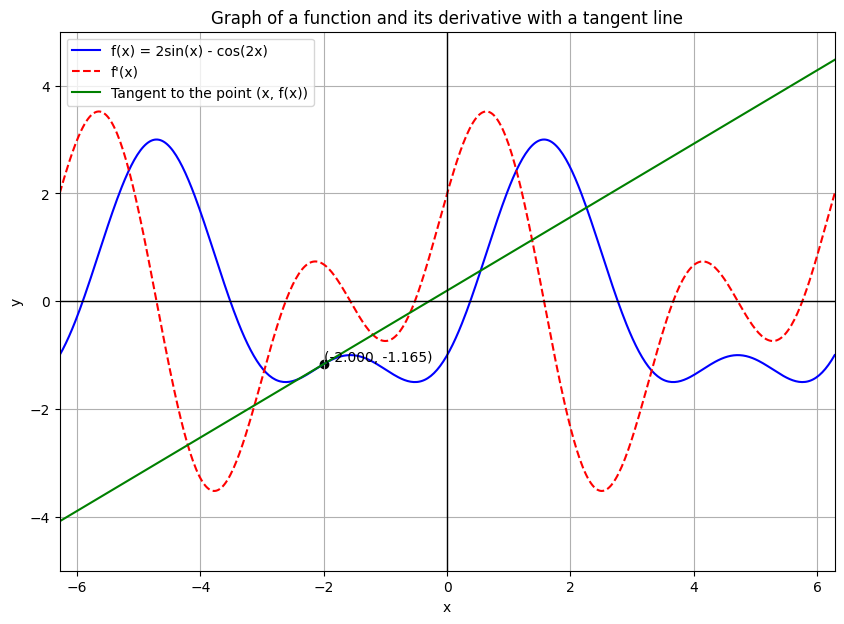

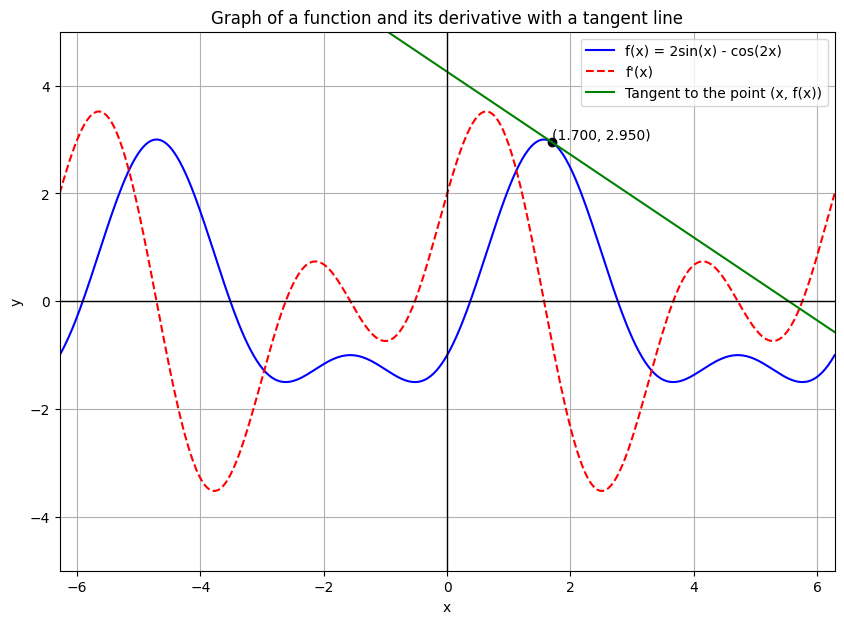

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def beauty_derivative_plot(x_point):
    # Находим производную
    x = sp.symbols('x')
    f = 2 * sp.sin(x) - sp.cos(2 * x)
    f_derivative = sp.diff(f, x)


    f_func = sp.lambdify(x, f, 'numpy')
    f_derivative_func = sp.lambdify(x, f_derivative, 'numpy')

    x_values = np.linspace(-2 * np.pi, 2 * np.pi, 500)
    y_values = f_func(x_values)
    y_derivative_values = f_derivative_func(x_values)
    y_point = f_func(x_point)
    slope = f_derivative_func(x_point)

    # Уравнение касательной
    tangent_line = slope * (x_values - x_point) + y_point


    plt.figure(figsize=(10, 7))
    plt.plot(x_values, y_values, label='f(x) = 2sin(x) - cos(2x)', color='blue')
    plt.plot(x_values, y_derivative_values, label="f'(x)", color='red',linestyle='--')
    plt.plot(x_values, tangent_line, label='Tangent to the point (x, f(x))', color='green')
    plt.scatter([x_point], [y_point], color='black')
    plt.text(x_point, y_point, f'({x_point:.3f}, {y_point:.3f})', fontsize=10, verticalalignment='bottom')
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.title('Graph of a function and its derivative with a tangent line')

    plt.xlim(-2 * np.pi, 2 * np.pi)
    plt.ylim(-5, 5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

# Пример
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with
```python
np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
```
and do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

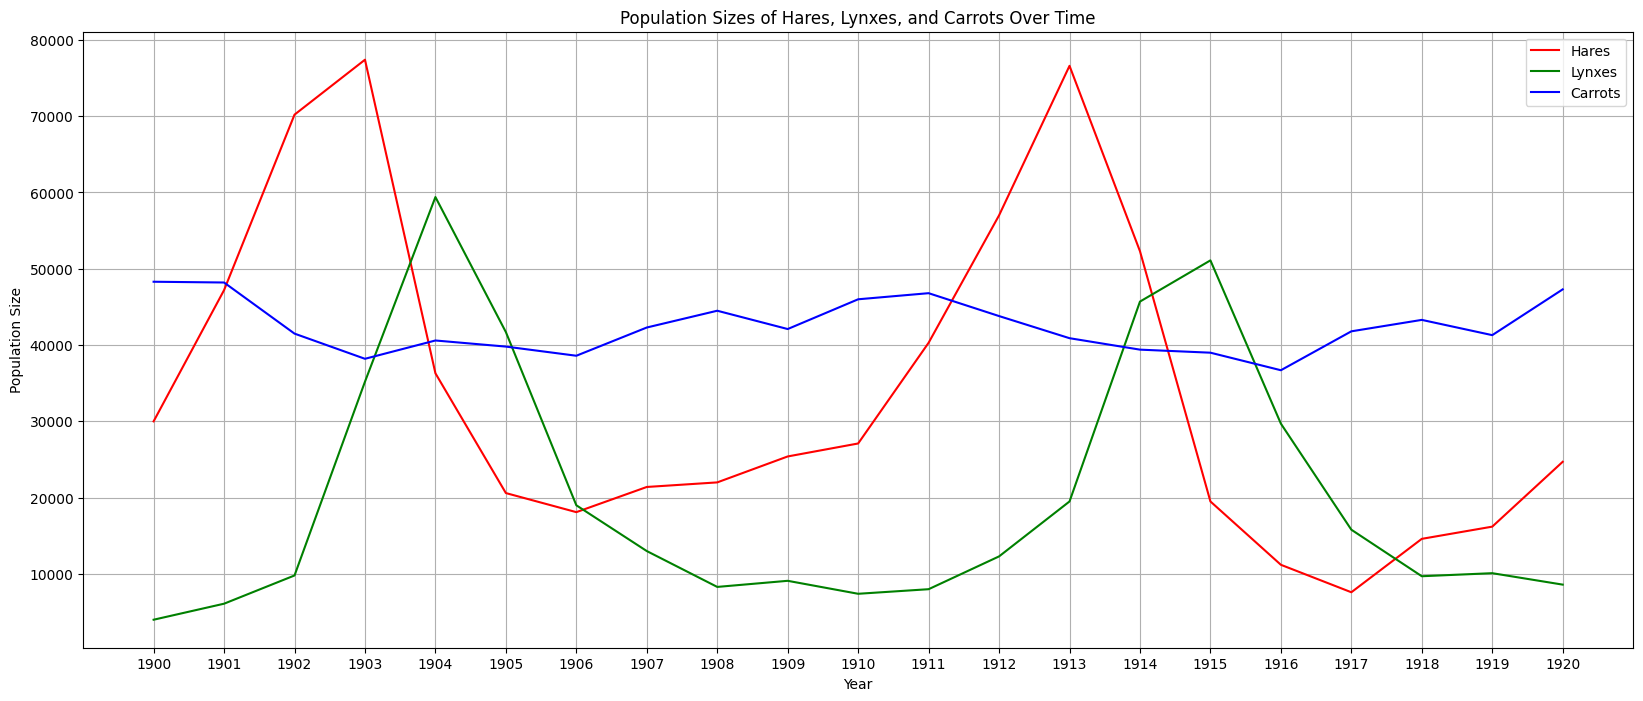

In [137]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')
# Извлечение данных
years = data[:, 0]      # Первый столбец - годы
hares = data[:, 1]      # Второй столбец - зайцы
lynxes = data[:, 2]     # Третий столбец - рыси
carrots = data[:, 3]    # Четвертый столбец - морковь

# Построение графика
plt.figure(figsize=(20, 8))
plt.plot(years, hares, label='Hares', color='red')
plt.plot(years, lynxes, label='Lynxes', color='green')
plt.plot(years, carrots, label='Carrots', color='blue')
plt.xticks(years)

# Добавление заголовков и меток
plt.title('Population Sizes of Hares, Lynxes, and Carrots Over Time')
plt.xlabel('Year')
plt.ylabel('Population Size')
plt.legend()
plt.grid()

plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

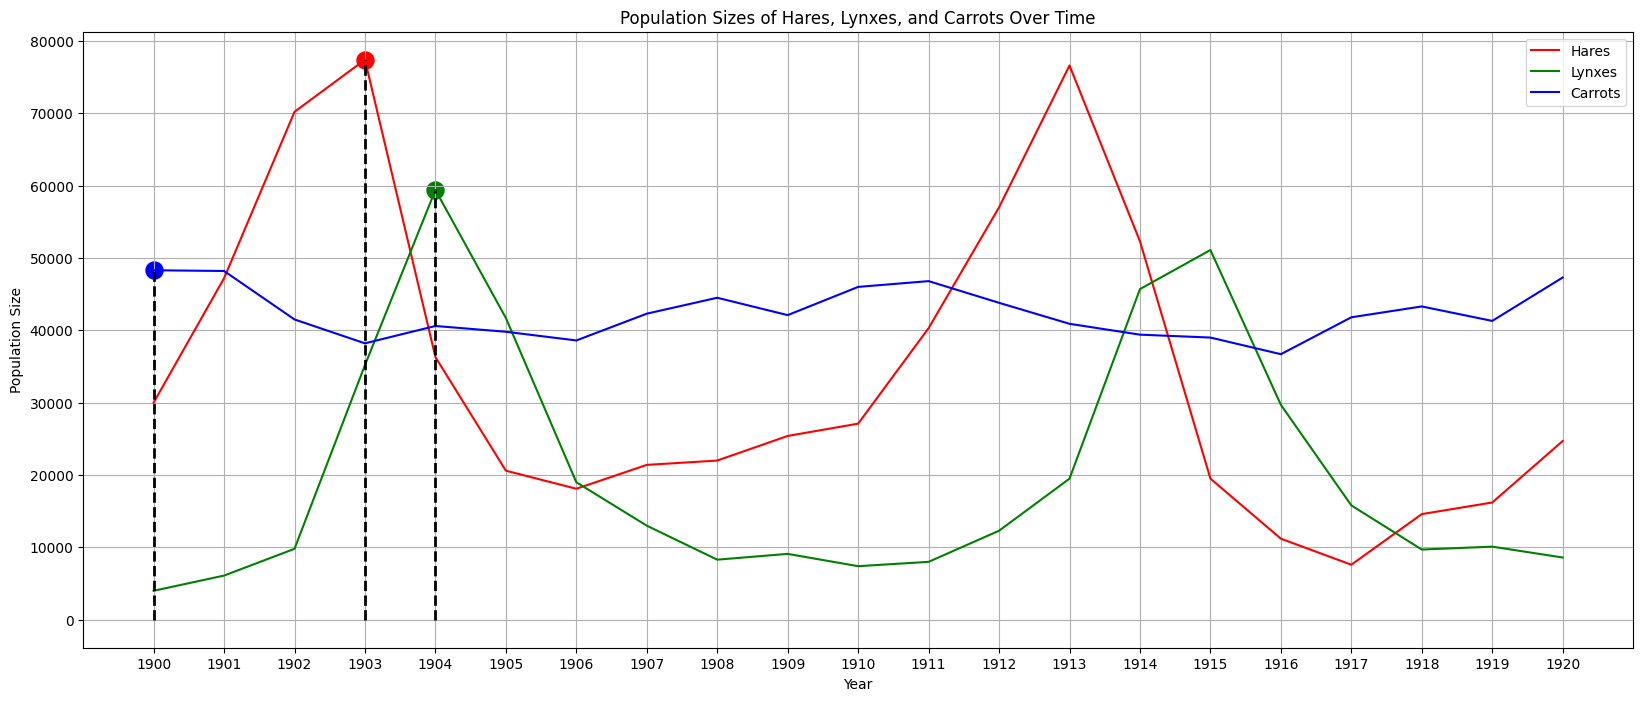

In [69]:
# Нахождение годов с максимальным населением для каждого вида
max_hare = np.argmax(hares)
max_lynx = np.argmax(lynxes)
max_carrot = np.argmax(carrots)

year_max_hare = years[max_hare]
year_max_lynx = years[max_lynx]
year_max_carrot = years[max_carrot]

# Построение графика
plt.figure(figsize=(20, 8))
plt.plot(years, hares, label='Hares', color='red')
plt.plot(years, lynxes, label='Lynxes', color='green')
plt.plot(years, carrots, label='Carrots', color='blue')
plt.xticks(np.arange(int(np.min(years)), int(np.max(years)) + 1, 1))

# Отметка годов с максимальным населением
plt.scatter(year_max_hare, hares[max_hare], color='red',s=150)
plt.scatter(year_max_lynx, lynxes[max_lynx], color='green',s=150)
plt.scatter(year_max_carrot, carrots[max_carrot], color='blue',s=150)
plt.plot([year_max_hare, year_max_hare], [0, hares[max_hare]], color='black', linestyle='--', linewidth=2)
plt.plot([year_max_lynx, year_max_lynx], [0, lynxes[max_lynx]], color='black', linestyle='--', linewidth=2)
plt.plot([year_max_carrot, year_max_carrot], [0, carrots[max_carrot]], color='black', linestyle='--', linewidth=2)

# Добавление заголовков и меток
plt.title('Population Sizes of Hares, Lynxes, and Carrots Over Time')
plt.xlabel('Year')
plt.ylabel('Population Size')
plt.legend()
plt.grid()

plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

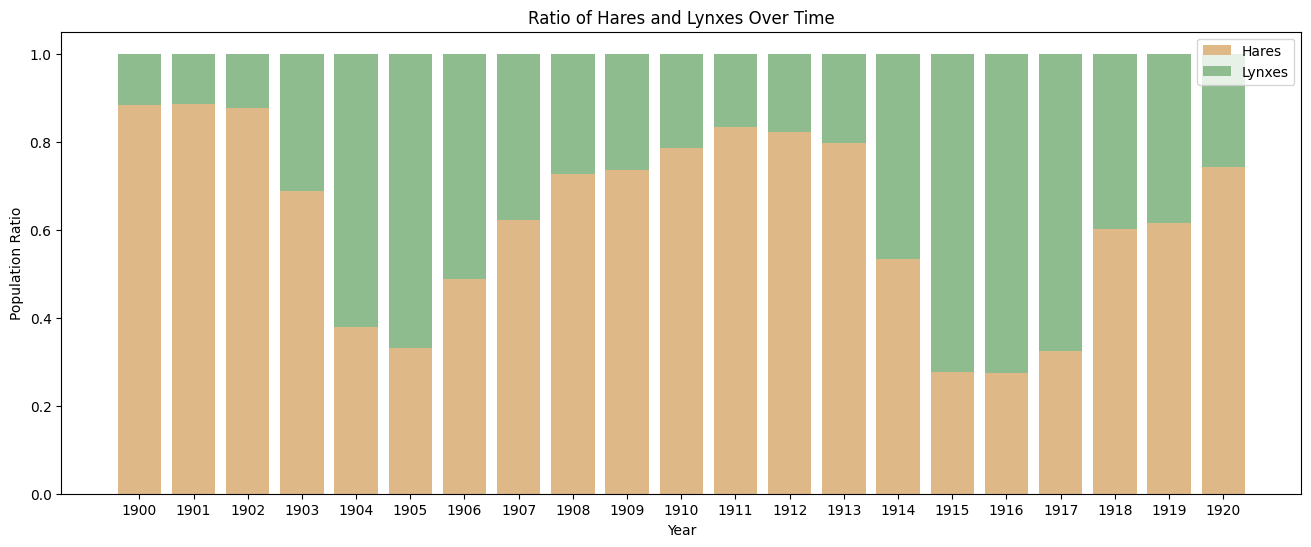

In [92]:
# Вычисление общего количества и долей
total_pop = hares + lynxes
hares_ratio = hares / total_pop
lynxes_ratio = lynxes / total_pop

# Построение графика
plt.figure(figsize=(16, 6))
plt.bar(years, hares_ratio, label='Hares', color='burlywood')
plt.bar(years, lynxes_ratio, bottom=hares_ratio, label='Lynxes', color='darkseagreen')

# Добавление заголовков и меток
plt.title('Ratio of Hares and Lynxes Over Time')
plt.xlabel('Year')
plt.ylabel('Population Ratio')
plt.xticks(years)  # Установка меток по годам

# Добавление легенды
plt.legend()

# Показать график
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

hares Average: 34080.95238095238, Standard deviation: 20897.906458089667
lynxes Average: 20166.666666666668, Standard deviation: 16254.591536908763
carrots Average: 42400.0, Standard deviation: 3322.5062255844787


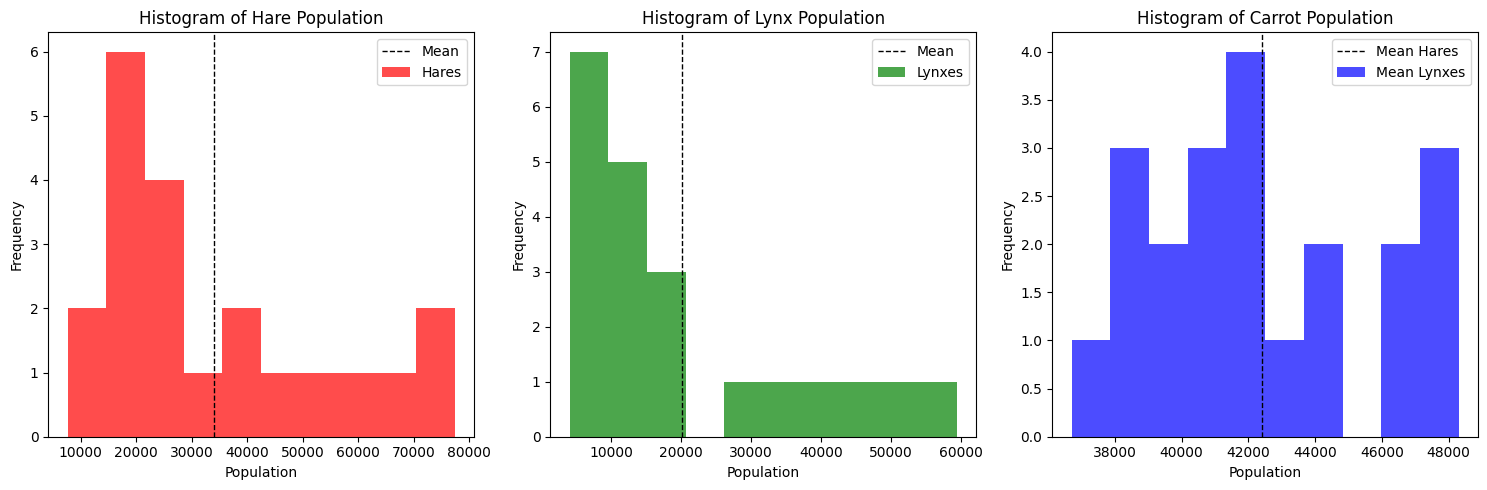

In [71]:
# Вычисление среднего значения и стандартного отклонения
hares_mean = np.mean(hares)
hares_std = np.std(hares)

lynxes_mean = np.mean(lynxes)
lynxes_std = np.std(lynxes)

carrots_mean = np.mean(carrots)
carrots_std = np.std(carrots)

# Печать значений среднего и стандартного отклонения
print(f'hares Average: {hares_mean}, Standard deviation: {hares_std}')
print(f'lynxes Average: {lynxes_mean}, Standard deviation: {lynxes_std}')
print(f'carrots Average: {carrots_mean}, Standard deviation: {carrots_std}')

# Создание графиков
plt.figure(figsize=(20, 5))

# График для зайцев
plt.subplot(1, 4, 1)
plt.hist(hares, bins=10, color='red', alpha=0.7)
plt.axvline(hares_mean, color='black', linestyle='dashed', linewidth=1)
plt.title('Histogram of Hare Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend(['Mean', 'Hares'])

# График для рыси
plt.subplot(1, 4, 2)
plt.hist(lynxes, bins=10, color='green', alpha=0.7)
plt.axvline(lynxes_mean, color='black', linestyle='dashed', linewidth=1)
plt.title('Histogram of Lynx Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend(['Mean', 'Lynxes'])

# График для моркови
plt.subplot(1, 4, 3)
plt.hist(carrots, bins=10, color='blue', alpha=0.7)
plt.axvline(carrots_mean, color='black', linestyle='dashed', linewidth=1)
plt.title('Histogram of Carrot Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend(['Mean', 'Carrots'])

plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend(['Mean Hares', 'Mean Lynxes', 'Mean Carrots', 'Hares', 'Lynxes', 'Carrots'])

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


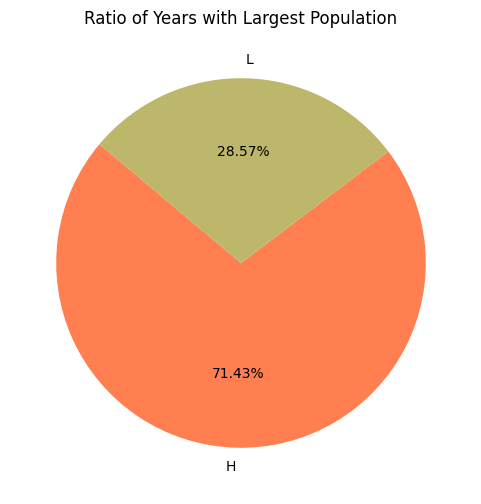

In [93]:
# Определение преобладающего вида
largest_species = np.where(hares > lynxes, 'H', 'L')
print(list(largest_species))


unique, counts = np.unique(largest_species, return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=unique, autopct='%.2f%%', startangle=140, colors=['coral', 'darkkhaki'])
plt.title('Ratio of Years with Largest Population')
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

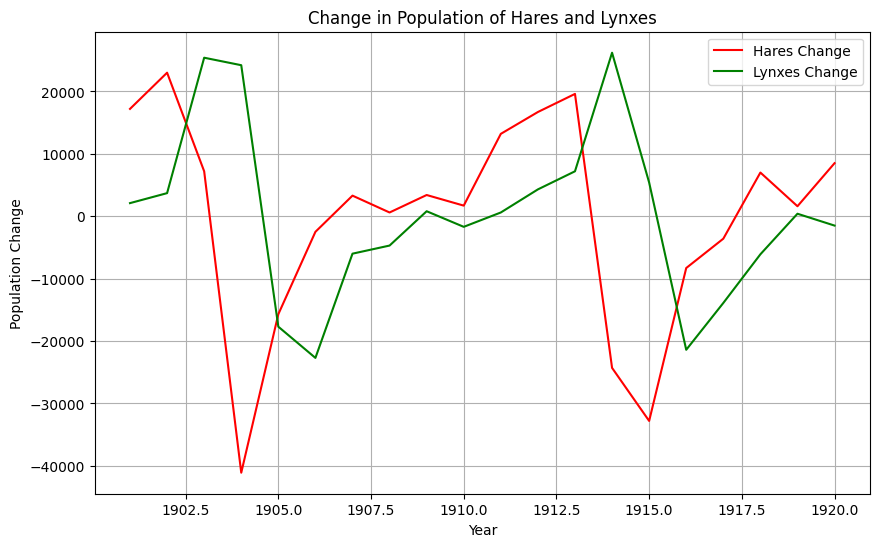

Correlation coefficient = -0.1780136594118296


In [91]:
# Изменение популяций
hares_change = np.diff(hares)
lynxes_change = np.diff(lynxes)

plt.figure(figsize=(10, 6))
plt.plot(years[1:], hares_change, label='Hares Change',color='red')
plt.plot(years[1:], lynxes_change, label='Lynxes Change',color='green')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Change in Population of Hares and Lynxes')
plt.legend()
plt.grid(True)
plt.show()

correlation = np.corrcoef(hares_change, lynxes_change)[0, 1]
print('Correlation coefficient =', correlation)

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

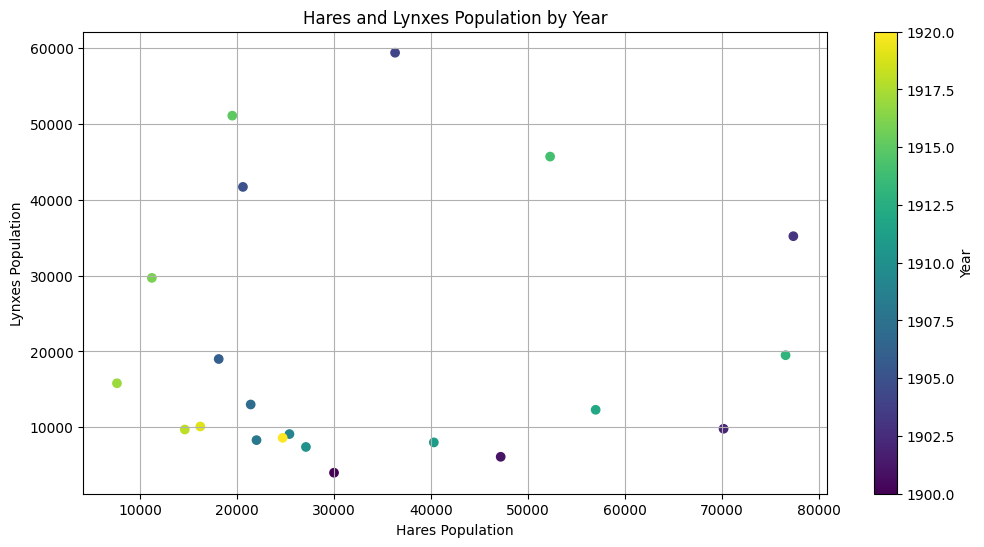

In [110]:
# Диаграмма рассеяния
plt.figure(figsize=(12, 6))
plt.scatter(hares, lynxes, c=years, label='Year')
plt.xlabel('Hares Population')
plt.ylabel('Lynxes Population')
plt.title('Hares and Lynxes Population by Year')
plt.colorbar(label='Year')
plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

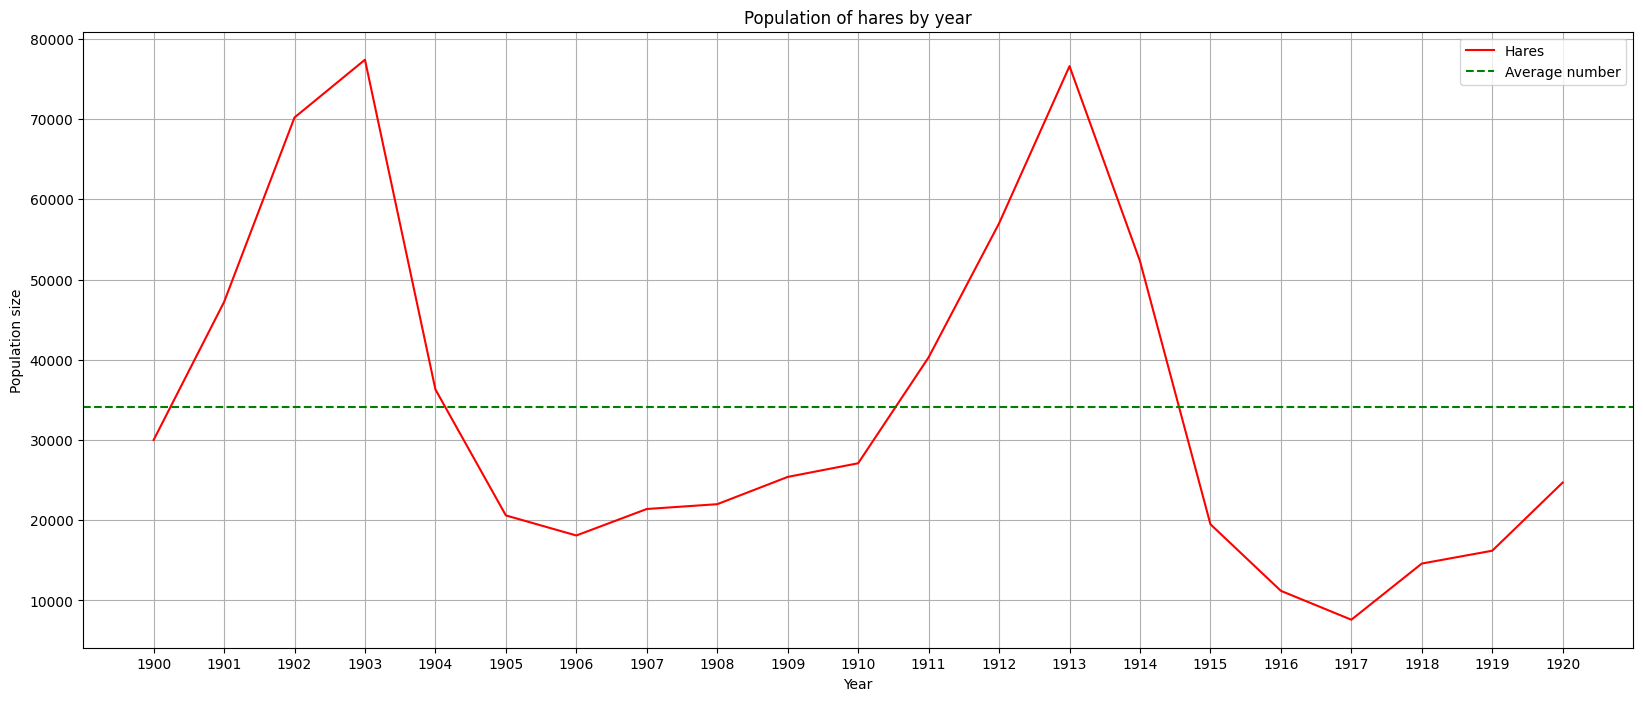

Average number of hares: 34080.95
Deviation from the expected value: 9380.952380952382


In [144]:
average_hares = np.mean(hares)


plt.figure(figsize=(20, 8))
plt.plot(years, hares, label='Hares', color='red')

# Добавляем линию средней популяции
plt.axhline(y=average_hares, color='green', linestyle='--', label='Average number')

# Настраиваем график
plt.title('Population of hares by year')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.xticks(years)
plt.legend()
plt.grid()

plt.show()


print(f"Average number of hares: {average_hares:.2f}")
print(f"Deviation from the expected value: {average_hares - hares[-1]}")